In [1]:
import pandas as pd
from CTL2.causal_tree_learn import CausalTree
from DGP.dgp2 import dgp2
from DGP.dgp1 import dgp1
from DGP.dgp3 import dgp3

from MC.mc1 import MC_MSE_1
from MC.mc2 import MC_MSE_2
import timeit
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from random import random

from sklearn.metrics import mean_squared_error as mse

import pickle as pkl
from notify_run import Notify 
notify = Notify() 

In [2]:
def mcreps_mse_all(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []
    MSEt = []
    true = np.ones(reps)
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp3(n)
        x1 = x_test[:,0]
        ctl_predict = MC_MSE_2(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        ATE1.append(np.mean(ctl_predict[np.where(x1 > 0)]))
        ATE0.append(np.mean(ctl_predict[np.where(x1 < 0)]))
        MSEt.append(np.sum(np.square(np.subtract(y_test[:,0],ctl_predict)))/n)

    mse_total = np.sum(np.array(MSEt))/reps
    mse1 = mse(np.array(ATE1),true)
    mse2 = mse(np.array(ATE0),true*-1)
    bias1 = np.sum(np.subtract(np.array(ATE1),true))/reps
    bias2 = np.sum(np.add(np.array(ATE0), true))/reps
    var1 = np.var(ATE1)
    var2 = np.var(ATE0)
    return mse1, mse2, bias1, bias2, var1, var2, mse_total

In [2]:
def mcreps_mse_all2(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []
    MSEt = []
    MSEb = []
    MSEv = []
    true = np.ones(reps)
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp3(n)
        x1 = x_test[:,0]
        ctl_predict = MC_MSE_2(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        ATE1.append(np.mean(ctl_predict[np.where(x1 > 0)]))
        ATE0.append(np.mean(ctl_predict[np.where(x1 < 0)]))
        nn = int(len(ctl_predict))
        MSEt.append(mse(ctl_predict,y_test[:,0]))
        MSEb.append(np.sum(np.subtract(ctl_predict,y_test[:,0]))/nn)
        MSEv.append(np.var(ctl_predict))
    mse_total = np.sum(np.array(MSEt))/reps
    mse1 = mse(np.array(ATE1),true)
    mse2 = mse(np.array(ATE0),true*-1)
    bias1 = np.sum(np.subtract(np.array(ATE1),true))/reps
    bias2 = np.sum(np.add(np.array(ATE0), true))/reps
    var1 = np.var(ATE1)
    var2 = np.var(ATE0)
    mseb = np.sum(np.array(MSEb))/reps
    msev = np.sum(np.array(MSEv))/reps
    return mse1, mse2, bias1, bias2, var1, var2, mse_total, mseb, msev

In [3]:
MSE1 = []
MSE2 = []
BIAS1 = []
BIAS2 = []
VAR1 = []
VAR2 = []
MSE_TOTAL = []
MSEB = []
MSEV = []
test_sizes = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]

n = 1000
reps = 1000

for size in test_sizes:
    mse1, mse2, bias1, bias2, var1, var2, mse_total, mseb, msev = mcreps_mse_all2(reps,n,size)    
    MSE1.append(mse1)
    MSE2.append(mse2)
    BIAS1.append(bias1)
    BIAS2.append(bias2)
    VAR1.append(var1)
    VAR2.append(var2)
    MSEB.append(mseb)
    MSEV.append(msev)
    MSE_TOTAL.append(mse_total)
    
notify.send('Done running the simulations 2') 

In [4]:
notify.send('maybe error')

In [5]:
df = pd.DataFrame([test_sizes, MSE1, MSE2, BIAS1, BIAS2, VAR1, VAR2, MSE_TOTAL, MSEB, MSEV]).transpose().set_index(0)
df.columns=['MSE1', 'MSE2', 'BIAS1', 'BIAS2', 'VAR1', 'VAR2', 'MSE_TOTAL', 'MSE_T_BIAS', 'MSE_T_VAR']

In [6]:
df

,MSE1,MSE2,BIAS1,BIAS2,VAR1,VAR2,MSE_TOTAL,MSE_T_BIAS,MSE_T_VAR
0,,,,,,,,,
0.25,0.167378,0.182087,-0.070517,0.081684,0.162405,0.175415,4.302110,0.007119,1.665855
0.30,0.142345,0.133060,-0.079522,0.080641,0.136021,0.126557,4.246607,-0.001695,1.595353
0.35,0.120348,0.115844,-0.094916,0.084045,0.111339,0.108780,4.223483,-0.006128,1.579402
0.40,0.108015,0.102154,-0.089033,0.094318,0.100088,0.093258,4.201015,0.003921,1.544806
0.45,0.095686,0.095851,-0.102838,0.097094,0.085111,0.086423,4.154214,0.001641,1.521336
0.50,0.087234,0.099777,-0.095645,0.114069,0.078086,0.086765,4.141533,0.008872,1.490312
0.55,0.085295,0.080336,-0.111525,0.099309,0.072857,0.070474,4.080298,-0.009230,1.428687
0.60,0.087848,0.091922,-0.132403,0.135369,0.070318,0.073598,3.986944,-0.000709,1.329373
0.65,0.090933,0.092160,-0.142126,0.147300,0.070734,0.070463,3.984412,0.004069,1.276167


In [7]:
with open('test9_1000_1000.pkl','wb') as f:
    pkl.dump(df, f)

In [43]:
with open('test1.pkl','rb') as f:
    df = pkl.load(f)

In [8]:
df

,MSE1,MSE2,BIAS1,BIAS2,VAR1,VAR2,MSE_TOTAL,MSE_T_BIAS,MSE_T_VAR
0,,,,,,,,,
0.25,0.167378,0.182087,-0.070517,0.081684,0.162405,0.175415,4.302110,0.007119,1.665855
0.30,0.142345,0.133060,-0.079522,0.080641,0.136021,0.126557,4.246607,-0.001695,1.595353
0.35,0.120348,0.115844,-0.094916,0.084045,0.111339,0.108780,4.223483,-0.006128,1.579402
0.40,0.108015,0.102154,-0.089033,0.094318,0.100088,0.093258,4.201015,0.003921,1.544806
0.45,0.095686,0.095851,-0.102838,0.097094,0.085111,0.086423,4.154214,0.001641,1.521336
0.50,0.087234,0.099777,-0.095645,0.114069,0.078086,0.086765,4.141533,0.008872,1.490312
0.55,0.085295,0.080336,-0.111525,0.099309,0.072857,0.070474,4.080298,-0.009230,1.428687
0.60,0.087848,0.091922,-0.132403,0.135369,0.070318,0.073598,3.986944,-0.000709,1.329373
0.65,0.090933,0.092160,-0.142126,0.147300,0.070734,0.070463,3.984412,0.004069,1.276167


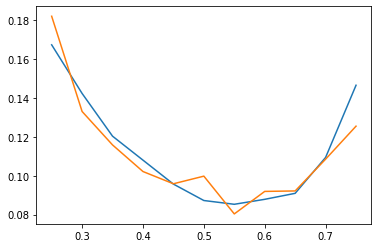

In [9]:
plt.plot(df['MSE1'])
plt.plot(df['MSE2'])

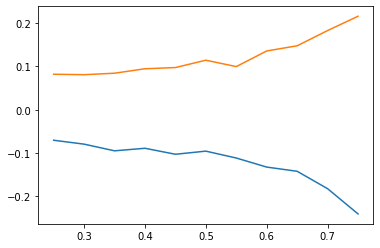

In [10]:
plt.plot(test_sizes, BIAS1)
plt.plot(test_sizes, BIAS2)

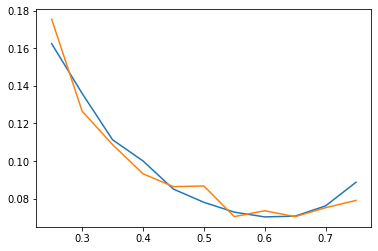

In [11]:
plt.plot(test_sizes, VAR1)
plt.plot(test_sizes, VAR2)

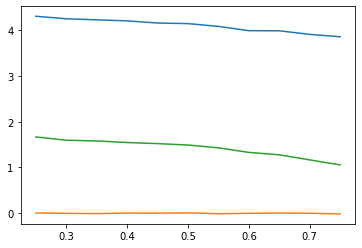

In [12]:
plt.plot(test_sizes, MSE_TOTAL)
plt.plot(test_sizes, MSEB)
plt.plot(test_sizes, MSEV)

In [55]:
test_sizes = [0.2, 0.25, 0.3, 0.4, 0.5]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
done
done
done


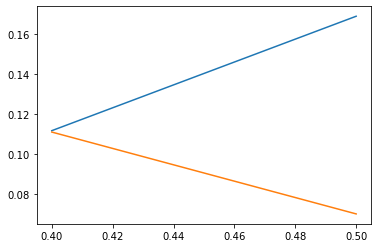

In [13]:
plt.plot(test_sizes, MSE1)
plt.plot(test_sizes, MSE2)

In [ ]:
test_sizes = [0.2, 0.3, 0.5, 0.7]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
